# Setup

## Modules

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import matplotlib
from matplotlib.lines import Line2D
import trend
import itertools
from scipy import stats
import datetime
import pickle
from pathlib import Path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
import HTfunctions as ht

## Data

In [20]:
ost = ht.openDict("Data/ostlandet_final.pkl")
vest = ht.openDict("Data/vestlandet_final.pkl")

altitudes = {}
altitudes["ost"] = np.array(ost["metadata"][ost["metadata"].snumber.isin(ost["final30"])].altitude)
altitudes["vest"] = np.array(vest["metadata"][vest["metadata"].snumber.isin(vest["final30"])].altitude)

# Plotting all daily trends


## Functions

In [58]:
def plotAltMag(array,region,withMinMax=False,subplotting=False,ax=None,legend=False,title=None):
    
    height = array.shape[0]/10
    
    mask = np.unique(np.where(array!=-99)[0])
    array = array[mask,:]
    
    alt = altitudes[region][mask]
    
    m = np.nanmean(array,axis=1)
    s = np.nanstd(array,axis=1)
    
    mini = []
    maxi = []
    for c in range(array.shape[0]):
        mini.append(np.nanmin(array[c,:]))
        maxi.append(np.nanmax(array[c,:]))
    
    if subplotting:
        ax.axvline(0,color="k",linewidth=1)
        
        if withMinMax:
            ax.fill_betweenx(alt,mini,maxi,color="lightgrey",alpha=0.5,label="Minimum-maximum values")
        
        ax.fill_betweenx(alt,m-s,m+s,color="grey",alpha=0.5,label="Standard deviation")

        ax.plot(m,alt,"b-",label="Mean")
        ax.set_title(title)
        #ax.set_ylabel(regionLabels[region],fontsize=14)
        ax.set_ylim(0,alt.max())
        
        if legend:
            ax.legend(loc="best")
    else:
        plt.figure(figsize=(5,height))
        plt.vlines(0,ymin=0,ymax=alt.max(),color="k",linewidth=1)
        plt.ylim(0,alt.max())
        if withMinMax:
            plt.fill_betweenx(alt,mini,maxi,color="lightgrey",alpha=0.5,label="Minimum-maximum values")

        plt.fill_betweenx(alt,m-s,m+s,color="grey",alpha=0.5,label="Standard deviation")

        plt.plot(m,alt,"b-",label="Mean")
        #plt.title(regionLabels[region])
        #plt.xlabel(f"Trend magnitude ({units[var]})")
        plt.ylabel("Altitude in $m.a.s.l.$")
        if legend:
            plt.legend(loc="best")

## Plotting

Results/Daily/trendMagnitudes_PROstreamflow_vest_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_snowmelt_vest_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_rainfall_vest_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_snowmeltContRunoff_vest_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_rainfallContRunoff_vest_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_temperature_vest_10dMA_1983_2012.npy


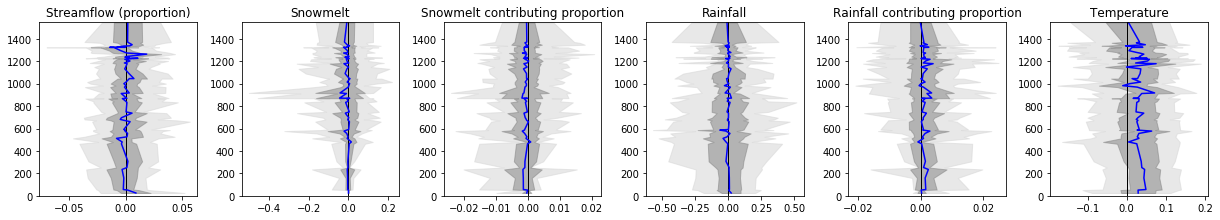

In [66]:
period = "1983_2012"
region = "vest"

var = "PROstream"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
Qpro = np.load(file)

var = "snowmelt_"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
SM = np.load(file)

var = "rainfall_"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
RF = np.load(file)

var = "snowmeltCont"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
SMcont = np.load(file)

var = "rainfallCont"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
RFcont = np.load(file)

var = "temperature"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
T = np.load(file)

kwargs = {"legend":False,
          "withMinMax":True,
          "subplotting":True}

fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(17,3))
plt.tight_layout()
plotAltMag(Qpro,region,title="Streamflow (proportion)",ax=ax[0],**kwargs)
plotAltMag(SM,region,title="Snowmelt",ax=ax[1],**kwargs)
plotAltMag(SMcont,region,title="Snowmelt contributing proportion",ax=ax[2],**kwargs)
plotAltMag(RF,region,title="Rainfall",ax=ax[3],**kwargs)
plotAltMag(RFcont,region,title="Rainfall contributing proportion",ax=ax[4],**kwargs)
plotAltMag(T,region,title="Temperature",ax=ax[5],**kwargs)
plt.savefig(f"Plots/{period}/altitudeDependence_{region}_10dMA_{period}.png",dpi=300,bbox_inches="tight")

Results/Daily/trendMagnitudes_PROstreamflow_ost_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_snowmelt_ost_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_rainfall_ost_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_snowmeltContRunoff_ost_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_rainfallContRunoff_ost_10dMA_1983_2012.npy
Results/Daily/trendMagnitudes_temperature_ost_10dMA_1983_2012.npy


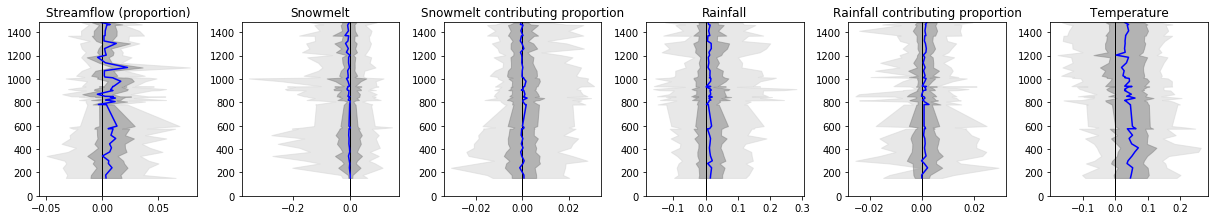

In [72]:
period = "1983_2012"
region = "ost"

var = "PROstream"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
Qpro = np.load(file)

var = "snowmelt_"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
SM = np.load(file)

var = "rainfall_"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
RF = np.load(file)

var = "snowmeltCont"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
SMcont = np.load(file)

var = "rainfallCont"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
RFcont = np.load(file)

var = "temperature"
file = ht.findFiles(f"*{var}*{region}*{period}*","Results/Daily/")[0]
print(file)
T = np.load(file)

kwargs = {"legend":False,
          "withMinMax":True,
          "subplotting":True}

fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(17,3))
plt.tight_layout()
plotAltMag(Qpro,region,title="Streamflow (proportion)",ax=ax[0],**kwargs)
plotAltMag(SM,region,title="Snowmelt",ax=ax[1],**kwargs)
plotAltMag(SMcont,region,title="Snowmelt contributing proportion",ax=ax[2],**kwargs)
plotAltMag(RF,region,title="Rainfall",ax=ax[3],**kwargs)
plotAltMag(RFcont,region,title="Rainfall contributing proportion",ax=ax[4],**kwargs)
plotAltMag(T,region,title="Temperature",ax=ax[5],**kwargs)
plt.savefig(f"Plots/{period}/altitudeDependence_{region}_10dMA_{period}.png",dpi=300,bbox_inches="tight")